# Principal Component Analysis (PCA)

observation: technique not difficult - reduce points to most significant subspace of 
correlation matrix.

my origina data is mxn. m samples with n features
the correlation matrix will (mxn)'*(mxn) -> nxn tell which features correlate with 
each other. The eigen vectors of this matrix become feature vectors that we can map the original data onto. By choosing the eigen vectors with only the highest eigen values we extract the strongest meta-features (and correlations).

Question: how could I know _a priori_ that the eigen vectors of a correlation matrix would do that...
$\Sigma = E' V E$. Is $\Sigma$ times anything significant. In general, a correlation matrix is fun because we can see which variables care about each other.

> __Short Answer__ The eigenvector with the largest eigenvalue is the direction along which the data set has the maximum variance. Meditate upon this.

> __Long answer__: Let's say you want to reduce the dimensionality of your data set, say down to just one dimension. In general, this means picking a unit vector $u$, and replacing each data point, $x_i$, with its projection along this vector, $u^T x_i $. Of course, you should choose $u$ so that you retain as much of the variation of the data points as possible: if your data points lay along a line and you picked $u$ orthogonal to that line, all the data points would project onto the same value, and you would lose almost all the information in the data set! So you would like to maximize the variance of the new data values $u^T x_i$. It's not hard to show that if the covariance matrix of the original data points $x_i$ was $\Sigma$, the variance of the new data points is just $u^T \Sigma u$. As $\Sigma$ is symmetric, the unit vector $u$ which maximizes  $u^T \Sigma u$ is nothing but the eigenvector with the largest eigenvalue.

Big take-away: $u^T \Sigma u$ is the variation of points along $u$ if $|u|=1$!!

In [ ]:
%%file pca.m
function [U, S] = pca(X)
%PCA Run principal component analysis on the dataset X
%   [U, S, X] = pca(X) computes eigenvectors of the covariance matrix of X
%   Returns the eigenvectors U, the eigenvalues (on diagonal) in S
%

% Useful values
[m, n] = size(X);

% You need to return the following variables correctly.
U = zeros(n);
S = zeros(n);

% ====================== YOUR CODE HERE ======================
% Instructions: You should first compute the covariance matrix. Then, you
%               should use the "svd" function to compute the eigenvectors
%               and eigenvalues of the covariance matrix. 
%
% Note: When computing the covariance matrix, remember to divide by m (the
%       number of examples).
%

% correlation matrix
Sigma = X'*X ./m ;
[U,S,V] = svd(Sigma);

% =========================================================================

end


In [ ]:
%load ex7_pca.m

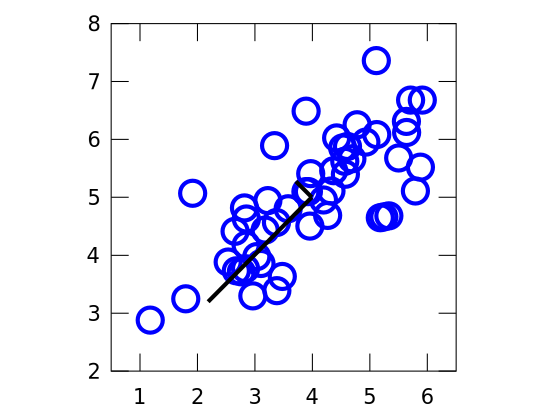

In [13]:
load ('ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;



In [ ]:
%% Machine Learning Online Class
%  Exercise 7 | Principle Component Analysis and K-Means Clustering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     pca.m
%     projectData.m
%     recoverData.m
%     computeCentroids.m
%     findClosestCentroids.m
%     kMeansInitCentroids.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easily to
%  visualize
%
fprintf('Visualizing example dataset for PCA.\n\n');

%  The following command loads the dataset. You should now have the 
%  variable X in your environment
load ('ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
axis([0.5 6.5 2 8]); axis square;

fprintf('Program paused. Press enter to continue.\n');
pause;


%% =============== Part 2: Principal Component Analysis ===============
%  You should now implement PCA, a dimension reduction technique. You
%  should complete the code in pca.m
%
fprintf('\nRunning PCA on example dataset.\n\n');

%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');

fprintf('Program paused. Press enter to continue.\n');
pause;


%% =================== Part 3: Dimension Reduction ===================
%  You should now implement the projection step to map the data onto the 
%  first k eigenvectors. The code will then plot the data in this reduced 
%  dimensional space.  This will show you what the data looks like when 
%  using only the corresponding eigenvectors to reconstruct it.
%
%  You should complete the code in projectData.m
%
fprintf('\nDimension reduction on example dataset.\n\n');

%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
axis([-4 3 -4 3]); axis square

%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =============== Part 4: Loading and Visualizing Face Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  The following code will load the dataset into your environment
%
fprintf('\nLoading face dataset.\n\n');

%  Load Face dataset
load ('ex7faces.mat')

%  Display the first 100 faces in the dataset
displayData(X(1:100, :));

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =========== Part 5: PCA on Face Data: Eigenfaces  ===================
%  Run PCA and visualize the eigenvectors which are in this case eigenfaces
%  We display the first 36 eigenfaces.
%
fprintf(['\nRunning PCA on face dataset.\n' ...
         '(this mght take a minute or two ...)\n\n']);

%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:36)');

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ============= Part 6: Dimension Reduction for Faces =================
%  Project images to the eigen space using the top k eigenvectors 
%  If you are applying a machine learning algorithm 
fprintf('\nDimension reduction for face dataset.\n\n');

K = 100;
Z = projectData(X_norm, U, K);

fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));

fprintf('\n\nProgram paused. Press enter to continue.\n');
pause;

%% ==== Part 7: Visualization of Faces after PCA Dimension Reduction ====
%  Project images to the eigen space using the top K eigen vectors and 
%  visualize only using those K dimensions
%  Compare to the original input, which is also displayed

fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

% Display normalized data
subplot(1, 2, 1);
displayData(X_norm(1:100,:));
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:100,:));
title('Recovered faces');
axis square;

fprintf('Program paused. Press enter to continue.\n');
pause;


%% === Part 8(a): Optional (ungraded) Exercise: PCA for Visualization ===
%  One useful application of PCA is to use it to visualize high-dimensional
%  data. In the last K-Means exercise you ran K-Means on 3-dimensional 
%  pixel colors of an image. We first visualize this output in 3D, and then
%  apply PCA to obtain a visualization in 2D.

close all; close all; clc

% Re-load the image from the previous exercise and run K-Means on it
% For this to work, you need to complete the K-Means assignment first
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255;
img_size = size(A);
X = reshape(A, img_size(1) * img_size(2), 3);
K = 16; 
max_iters = 10;
initial_centroids = kMeansInitCentroids(X, K);
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);

%  Sample 1000 random indexes (since working with all the data is
%  too expensive. If you have a fast computer, you may increase this.
sel = floor(rand(1000, 1) * size(X, 1)) + 1;

%  Setup Color Palette
palette = hsv(K);
colors = palette(idx(sel), :);

%  Visualize the data and centroid memberships in 3D
figure;
scatter3(X(sel, 1), X(sel, 2), X(sel, 3), 10, colors);
title('Pixel dataset plotted in 3D. Color shows centroid memberships');
fprintf('Program paused. Press enter to continue.\n');
pause;

%% === Part 8(b): Optional (ungraded) Exercise: PCA for Visualization ===
% Use PCA to project this cloud to 2D for visualization

% Subtract the mean to use PCA
[X_norm, mu, sigma] = featureNormalize(X);

% PCA and project the data to 2D
[U, S] = pca(X_norm);
Z = projectData(X_norm, U, 2);

% Plot in 2D
figure;
plotDataPoints(Z(sel, :), idx(sel), K);
title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');
fprintf('Program paused. Press enter to continue.\n');
pause;


In [ ]:
%%file projectData.m
function Z = projectData(X, U, K)
%PROJECTDATA Computes the reduced data representation when projecting only 
%on to the top k eigenvectors
%   Z = projectData(X, U, K) computes the projection of 
%   the normalized inputs X into the reduced dimensional space spanned by
%   the first K columns of U. It returns the projected examples in Z.
%

% You need to return the following variables correctly.
Z = zeros(size(X, 1), K);

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the projection of the data using only the top K 
%               eigenvectors in U (first K columns). 
%               For the i-th example X(i,:), the projection on to the k-th 
%               eigenvector is given as follows:
%                    x = X(i, :)';
%                    projection_k = x' * U(:, k);
%

Z = X * U(:,1:K);



% =============================================================

end


In [8]:
%%file recoverData.m
function X_rec = recoverData(Z, U, K)
%RECOVERDATA Recovers an approximation of the original data when using the 
%projected data
%   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
%   original data that has been reduced to K dimensions. It returns the
%   approximate reconstruction in X_rec.
%

% You need to return the following variables correctly.
X_rec = zeros(size(Z, 1), size(U, 1));

% ====================== YOUR CODE HERE ======================
% Instructions: Compute the approximation of the data by projecting back
%               onto the original space using the top K eigenvectors in U.
%
%               For the i-th example Z(i,:), the (approximate)
%               recovered data for dimension j is given as follows:
%                    v = Z(i, :)';
%                    recovered_j = v' * U(j, 1:K)';
%
%               Notice that U(j, 1:K) is a row vector.
%               

X_rec = Z * (U(:,1:K))';


% =============================================================

end


Created file '/Users/jlatmann/Programming/octave/machine-learning-ex7/ex7/recoverData.m'.


# Joe's Data Café
for the comfortably different and the uncomfortably conformed.


In [3]:
10000 / (8*60*60/10)


ans =  3.4722


In [5]:
((1000 - 10)/2)^2 + ((1000 - 20)/2)^2

ans =  485125


In [6]:
10000 / (4*60) * 10

ans =  416.67
